# Importing the library

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot 
import seaborn as sns

# 1. Data Preprocessing

In [2]:
df=pd.read_csv('Penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.shape

(344, 7)

In [5]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
df[df.sex.isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
df.sex.replace(['male','female'],[1,0],inplace=True)

In [10]:
catvar=list(df.describe(include='O').columns)
catvar=df[catvar]
catvar

,species,island
0,Adelie,Torgersen
1,Adelie,Torgersen
2,Adelie,Torgersen
4,Adelie,Torgersen
5,Adelie,Torgersen
...,...,...
339,Chinstrap,Dream
340,Chinstrap,Dream
341,Chinstrap,Dream
342,Chinstrap,Dream


In [11]:
for i in catvar:
    print(df[i].unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']


In [12]:
catvar.columns

Index(['species', 'island'], dtype='object')

In [13]:
cat_dummies=pd.get_dummies(catvar,drop_first=True)

In [14]:
df1=df.drop(['species', 'island'],axis=1)

In [15]:
new_df=pd.concat([df1,cat_dummies],axis=1)

In [16]:
new_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,1


# 2. Data Visualization

In [17]:
df.sex.value_counts()

1    168
0    165
Name: sex, dtype: int64

Text(0.5, 1.0, 'Countplot of Sex ')

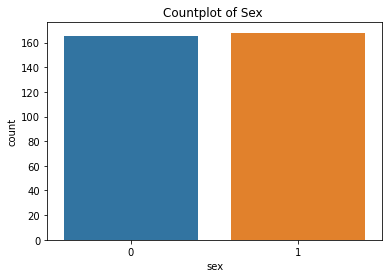

In [19]:
import matplotlib.pyplot as plt
sns.countplot(df.sex)
plt.title('Countplot of Sex ')

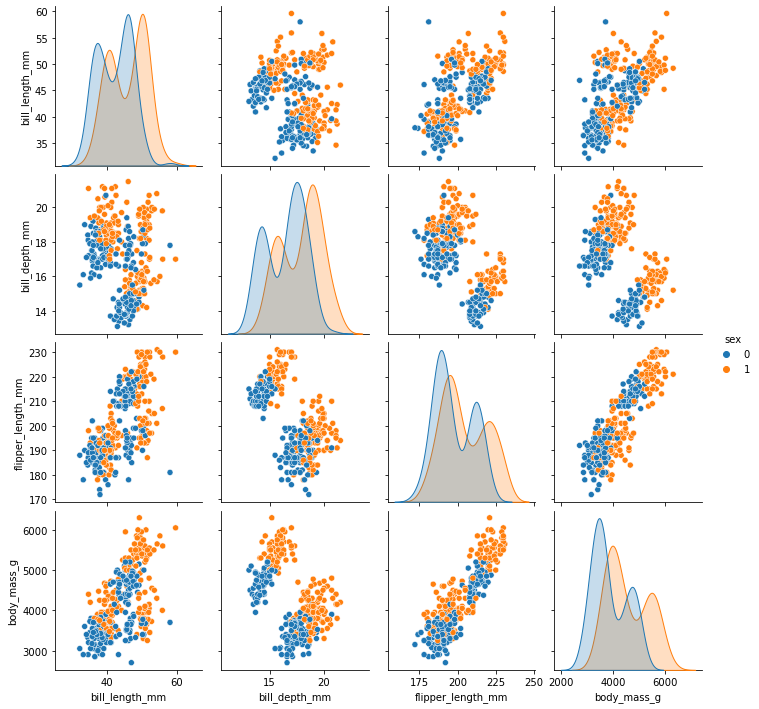

In [20]:
import seaborn as sns
sns.pairplot(df,hue='sex')

In [21]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.344078
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,0.372673
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.255169
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.424987
sex,0.344078,0.372673,0.255169,0.424987,1.000000


<AxesSubplot:>

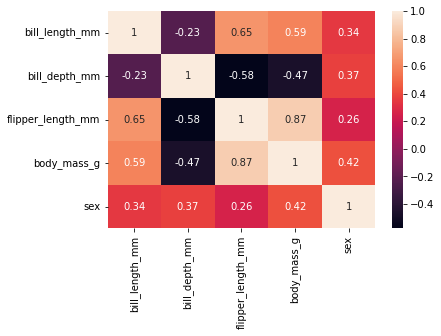

In [22]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [23]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# 2.1 Scatterplot

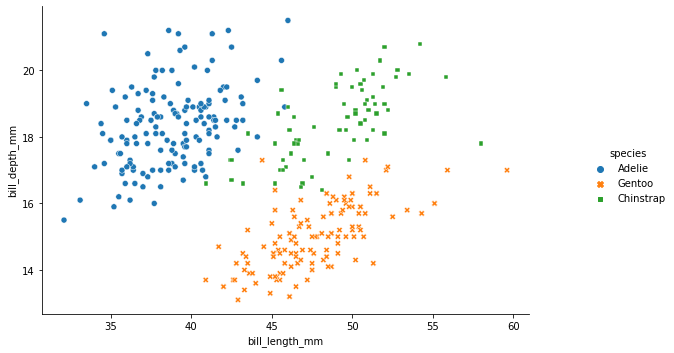

In [24]:
import matplotlib.pyplot as plt
g=sns.relplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

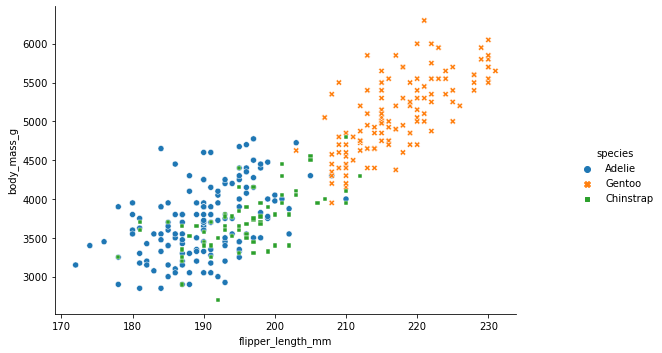

In [25]:
g=sns.relplot(x='flipper_length_mm',y='body_mass_g',data=df,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

In [26]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

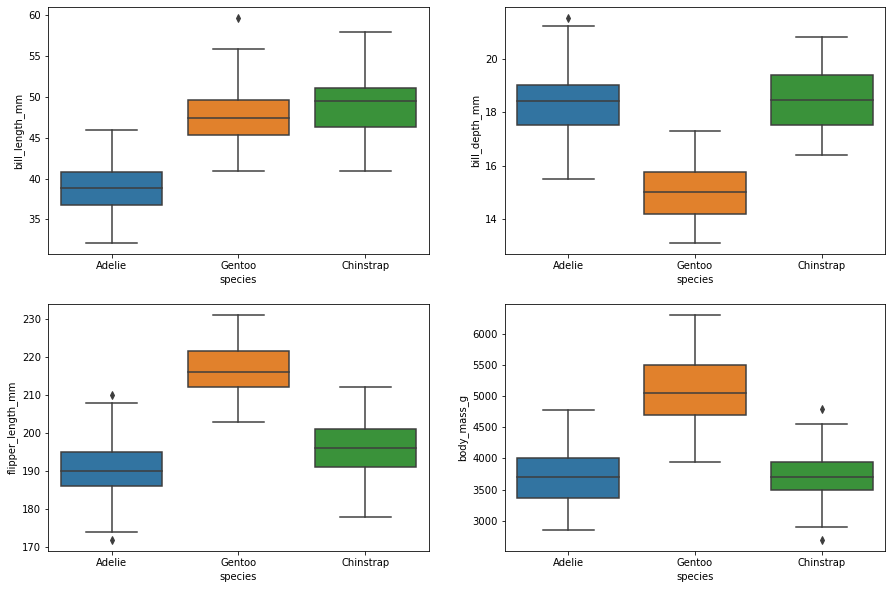

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='bill_length_mm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='bill_depth_mm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='flipper_length_mm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='body_mass_g',data=df)
plt.show()

In [151]:
numeric=df.describe(include=['int','float'])

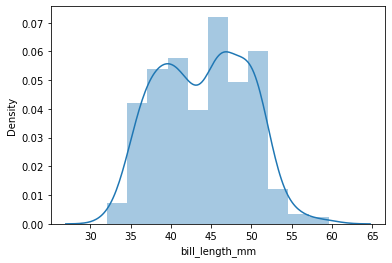

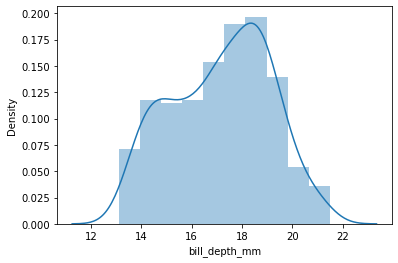

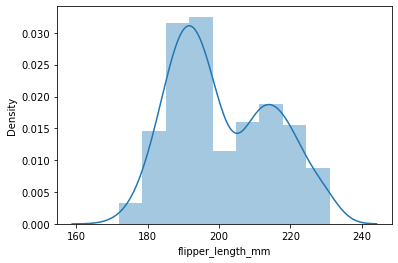

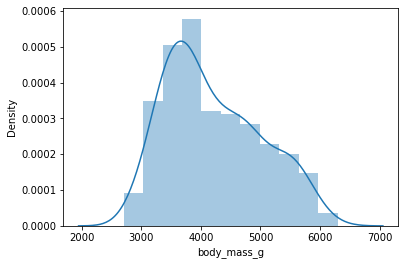

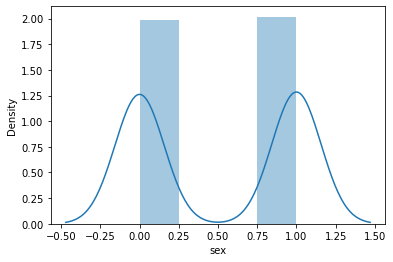

In [153]:
for i in numeric.columns:
    sns.distplot(df[i])
    plt.show()

In [28]:
new_df.to_csv('penguins_cleaned_data.csv')

In [29]:
X=new_df.loc[:,new_df.columns!='sex']
y=new_df.loc[:,new_df.columns=='sex']

In [30]:
y.value_counts()

sex
1      168
0      165
dtype: int64

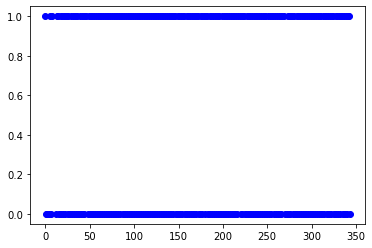

In [31]:
import matplotlib.pyplot as plt
plt.plot(y,'bo')

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
print('X_train =',len(X_train))
print('X_test =',len(X_test))
print('y_train =',len(y_train))
print('y_test =',len(y_test))

X_train = 266
X_test = 67
y_train = 266
y_test = 67


In [34]:
from sklearn import svm

svcT=svm.SVC(kernel='linear',C=1,gamma='auto',probability=True).fit(X_train,y_train)

In [35]:
print(svcT)

SVC(C=1, gamma='auto', kernel='linear', probability=True)


In [36]:
y_pred=svcT.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34,  4],
       [ 5, 24]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.86      0.83      0.84        29

    accuracy                           0.87        67
   macro avg       0.86      0.86      0.86        67
weighted avg       0.87      0.87      0.87        67



# ROC Curve

In [39]:
preds1=svcT.predict_proba(X_test)[:,1]

In [40]:
preds1.shape

(67,)

In [41]:
from sklearn.metrics import roc_curve,auc

In [42]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,preds1)

In [43]:
auc=metrics.auc(fpr,tpr)
auc

0.956442831215971

# ROC Curve

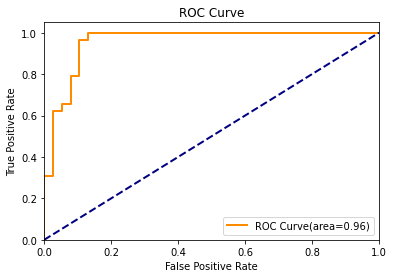

In [44]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8656716417910447

# will perform using rbf kernel

In [46]:
from sklearn import svm

svcT=svm.SVC(kernel='rbf',C=1,gamma='auto',probability=True).fit(X_train,y_train)

In [47]:
print(svcT)

SVC(C=1, gamma='auto', probability=True)


In [48]:
y_pred=svcT.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18, 20],
       [ 2, 27]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.57      0.93      0.71        29

    accuracy                           0.67        67
   macro avg       0.74      0.70      0.67        67
weighted avg       0.76      0.67      0.66        67



# ROC Curve

In [51]:
preds1=svcT.predict_proba(X_test)[:,1]

In [52]:
preds1.shape

(67,)

In [53]:
from sklearn.metrics import roc_curve,auc

In [54]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,preds1)

In [55]:
auc=metrics.auc(fpr,tpr)
auc

0.837568058076225

In [56]:
accuracy_score(y_test,y_pred)

0.6716417910447762

# ROC Curve

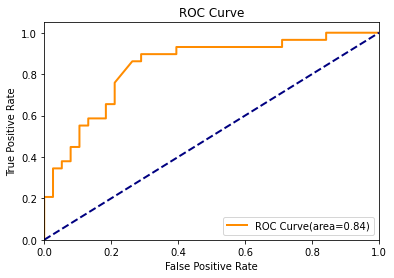

In [57]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## When compared to linear and rbf kernel the linear kernel is performing well and gave 96% auc where by using rbf is giving 84%

# will perform Knn model

## Before building the model will make the data standardized

In [58]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,0,1
...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1,0,1,0
340,43.5,18.1,202.0,3400.0,1,0,1,0
341,49.6,18.2,193.0,3775.0,1,0,1,0
342,50.8,19.0,210.0,4100.0,1,0,1,0


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [61]:
scaler.fit(X)        # here it selects all the data except the target variable 

StandardScaler()

In [62]:
scaled_features=scaler.transform(X)

In [63]:
X=pd.DataFrame(scaled_features,columns=X.columns)        # we are assigning the column name to the data we got in the scaled_reatures
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,-0.896042,0.780732,-1.426752,-0.568475,-0.506561,-0.745704,-0.765320,2.466801
1,-0.822788,0.119584,-1.069474,-0.506286,-0.506561,-0.745704,-0.765320,2.466801
2,-0.676280,0.424729,-0.426373,-1.190361,-0.506561,-0.745704,-0.765320,2.466801
3,-1.335566,1.085877,-0.569284,-0.941606,-0.506561,-0.745704,-0.765320,2.466801
4,-0.859415,1.747026,-0.783651,-0.692852,-0.506561,-0.745704,-0.765320,2.466801
...,...,...,...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,1.974097,-0.745704,1.306643,-0.405383
329,-0.090248,0.475587,0.073816,-1.003795,1.974097,-0.745704,1.306643,-0.405383
330,1.026876,0.526444,-0.569284,-0.537380,1.974097,-0.745704,1.306643,-0.405383
331,1.246638,0.933305,0.645461,-0.133155,1.974097,-0.745704,1.306643,-0.405383


# Using KNN [K-nearest neighbor]

In [64]:
## Remember that we are trying to comeup with a model to predict the actual data where will take n_neighbors as 1 initally to derive the data

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn=KNeighborsClassifier(n_neighbors=1)

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
y_pred=knn.predict(X_test)

# Predictions and Evaluations

### Let's evaluate our KNN model

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [71]:
confusion_matrix(y_test,y_pred)

array([[35,  3],
       [ 4, 25]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.89      0.86      0.88        29

    accuracy                           0.90        67
   macro avg       0.90      0.89      0.89        67
weighted avg       0.90      0.90      0.90        67



In [73]:
# the data is underfiting because the data is predicting by using only one data (where k=1) and coming for conclusion

# Choosing a K Value

## let's go ahead and use the elbow method to pick a good k-value:

In [74]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [86]:
accuracy_rate=[]

for i in range(1,40):    # let use the k-value as 40  by using the 1-40 data points we are making the data to predict 
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,df['sex'],cv=10)    # we are performing the 10 different ways or experiment will perform
    accuracy_rate.append(score.mean())

In [87]:
error_rate=[]
for i in range(1,40):    # let use the k-value as 40  by using the 1-40 data points we are making the data to predict 
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,df['sex'],cv=10)    # we are performing the 10 different ways or experiment will perform
    error_rate.append(1-score.mean())

Text(0, 0.5, 'accuracy_rate')

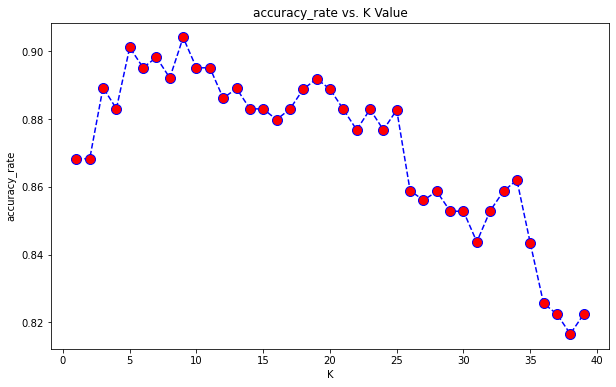

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

Text(0, 0.5, 'Error Rate')

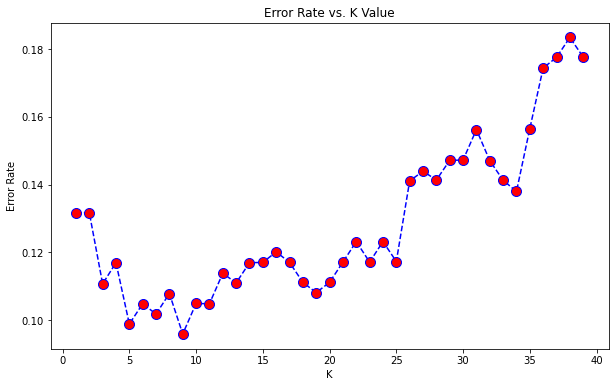

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [90]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred1))
print('\n')
print(classification_report(y_test,y_pred1))

WITH K=1


[[35  3]
 [ 4 25]]


              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.89      0.86      0.88        29

    accuracy                           0.90        67
   macro avg       0.90      0.89      0.89        67
weighted avg       0.90      0.90      0.90        67



In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8955223880597015

In [92]:
# NOW WITH K=9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,y_pred2))
print('\n')
print(classification_report(y_test,y_pred2))

WITH K=27


[[35  3]
 [ 2 27]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.90      0.93      0.92        29

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.93      0.93      0.93        67



In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9253731343283582

There are many classifying algorithms present. Among them, we choose the following *Classification* algorithms for our problem:

- Logistic Regression
- Support Vector Machines (SVC)
- Linear SVC
- k-Nearest Neighbor (KNN)
- Decision Tree
- Random Forest
- Naive Bayes (GaussianNB)
- Perceptron
- Stochastic Gradient Descent (SGD)

Here's the training and testing procedure:

> First, we train these classifiers with our training data. 
>
> After that, using the trained classifier, we predict the *Survival* outcome of test data.
>
> Finally, we calculate the accuracy score (in percentange) of the trained classifier.

***Please note:*** that the accuracy score is generated based on our training dataset.

In [78]:
# Importing Classifing Modules

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# Model

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred_model1=model1.predict(X_test)
acc_model1=round(accuracy_score(y_test,y_pred_model1)*100,2)
print(str(acc_model1)+'%')

91.04%


# SVM[Support Vector Machine]

In [119]:
from sklearn.svm import SVC,LinearSVC

model2=SVC()
model2.fit(X_train,y_train)
y_pred_model2=model2.predict(X_test)
acc_model2=round(accuracy_score(y_test,y_pred_model2)*100,2)
acc_model2

95.52

# KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier

model3=KNeighborsClassifier()
model3.fit(X_train,y_train)
y_pred_model3=model3.predict(X_test)
acc_model3=round(accuracy_score(y_test,y_pred_model3)*100,2)
print(acc_model3)

89.55


# Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train,y_train)
y_pred_model4=model4.predict(X_test)
acc_model4=round(accuracy_score(y_test,y_pred_model4)*100,2)
acc_model4

83.58

# Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

model5=RandomForestClassifier(n_estimators=100)
model5.fit(X_train,y_train)
y_pred_model5=model5.predict(X_test)
acc_model5=round(accuracy_score(y_test,y_pred_model5)*100,2)
acc_model5

95.52

In [121]:
y_test.value_counts()

sex
0      38
1      29
dtype: int64

### will consider RandomForestClassifier because it is giving me the higest accuracy when compared to other model

94.03
Confusion Matrix in Numbers
[[35  3]
 [ 1 28]]

Confusion Matrix in Percentage
[[0.92 0.08]
 [0.03 0.97]]



<AxesSubplot:>

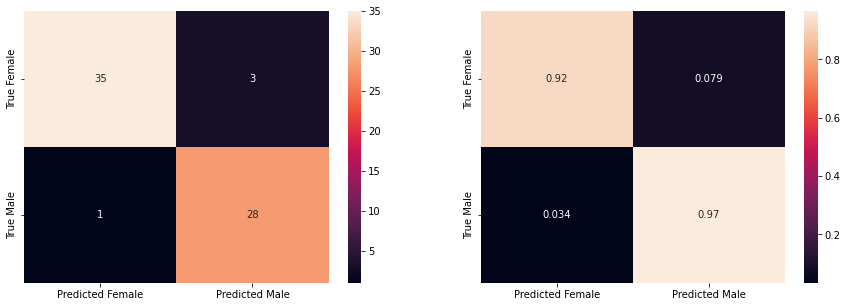

In [159]:
from sklearn.metrics import confusion_matrix
import itertools

model5=RandomForestClassifier(n_estimators=100)
model5.fit(X_train,y_train)
y_pred_model5=model5.predict(X_test)
acc_model5=round(accuracy_score(y_test,y_pred_model5)*100,2)
print(acc_model5)

class_names = ['male','female']

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_model5)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Female', 'True Male']
predicted_class_names = ['Predicted Female', 'Predicted Male']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [129]:
y_test.value_counts()

sex
0      38
1      29
dtype: int64

In [140]:
proba_model5=model5.predict_proba(X_test)[:,1]

In [141]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,proba_model5)

In [143]:
auc=metrics.auc(fpr,tpr)
auc

0.9827586206896552

# ROC Curve

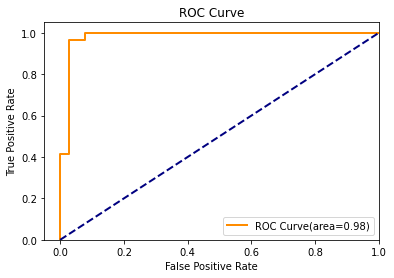

In [147]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [157]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'KNN', 'Decision Tree', 'Random Forest'],
    
    'Score': [acc_model1,acc_model2,acc_model3,acc_model4,acc_model5]
    })

models.sort_values(by='Score', ascending=False)


,Model,Score
1,Support Vector Machines,95.52
4,Random Forest,95.52
0,Logistic Regression,91.04
2,KNN,89.55
3,Decision Tree,83.58
